In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
df.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [3]:
s = "melanoma, melanocytic_nevus, basal_cell_carcinoma, actinic_keratosis, benign_keratosis, dermatofibroma, vascular_lesion, squamous_cell_carcinoma, other"

In [4]:
classes_to_idx = {c: i for i, c in enumerate(s.split(", "))}
idx_to_classes = {i: c for i, c in enumerate(s.split(", "))}
print(classes_to_idx)
print(idx_to_classes)
# Same but as np.array
classes_to_idx_np = np.array(list(classes_to_idx.values()))
idx_to_classes_np = np.array(list(idx_to_classes.values()))
print(classes_to_idx_np)
print(idx_to_classes_np)

{'melanoma': 0, 'melanocytic_nevus': 1, 'basal_cell_carcinoma': 2, 'actinic_keratosis': 3, 'benign_keratosis': 4, 'dermatofibroma': 5, 'vascular_lesion': 6, 'squamous_cell_carcinoma': 7, 'other': 8}
{0: 'melanoma', 1: 'melanocytic_nevus', 2: 'basal_cell_carcinoma', 3: 'actinic_keratosis', 4: 'benign_keratosis', 5: 'dermatofibroma', 6: 'vascular_lesion', 7: 'squamous_cell_carcinoma', 8: 'other'}
[0 1 2 3 4 5 6 7 8]
['melanoma' 'melanocytic_nevus' 'basal_cell_carcinoma' 'actinic_keratosis'
 'benign_keratosis' 'dermatofibroma' 'vascular_lesion'
 'squamous_cell_carcinoma' 'other']


In [5]:
idx_df = df[df.columns[df.columns!="image"]].to_numpy().argmax(axis=1)
classes_df = idx_to_classes_np[idx_df]
df_res = pd.DataFrame({"image": df["image"], "class": classes_df,"class_idx":idx_df})

#Remove the _downsampled from the image name
df_res["image"] = df_res["image"].apply(lambda x: x.replace("_downsampled", ""))
df_res.head()

,image,class,class_idx
0,ISIC_0000000,melanocytic_nevus,1
1,ISIC_0000001,melanocytic_nevus,1
2,ISIC_0000002,melanoma,0
3,ISIC_0000003,melanocytic_nevus,1
4,ISIC_0000004,melanoma,0


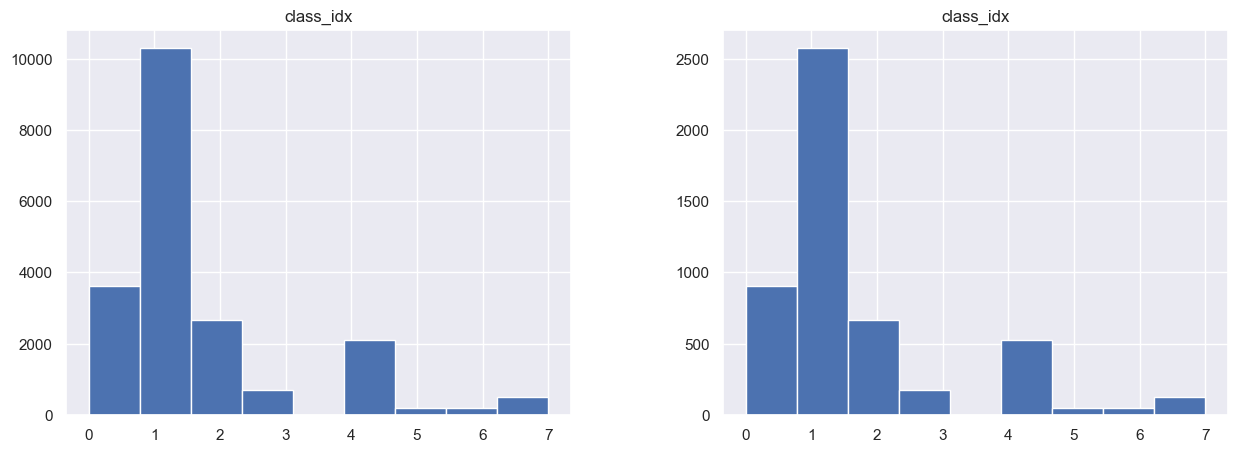

In [10]:
#Split train/test
if False : #Do not run this cell
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df_res, test_size=0.2,random_state=1312,stratify=df_res["class_idx"])
    _, train_1 = train_test_split(train, test_size=0.01,random_state=1312,stratify=train["class_idx"])
    _, train_10 = train_test_split(train, test_size=0.1,random_state=1312,stratify=train["class_idx"])
    train.to_csv("ISIC_2019_train_split_100.csv", index=False)
    train_1.to_csv("ISIC_2019_train_split_1.csv", index=False)
    train_10.to_csv("ISIC_2019_train_split_10.csv", index=False)
    test.to_csv("ISIC_2019_test_split.csv", index=False)

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    train.hist(column="class_idx", bins=9,ax=ax[0])
    test.hist(column="class_idx", bins=9,ax=ax[1])

array([<AxesSubplot:title={'center':'class_idx'}>], dtype=object)

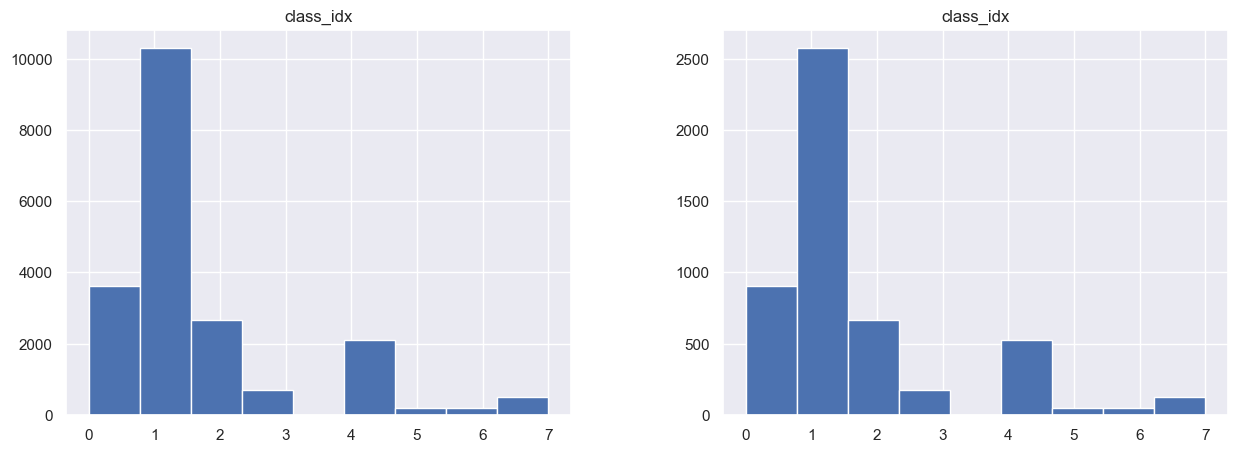

In [11]:
train_100 = pd.read_csv("ISIC_2019_train_split_100.csv")
train_1 = pd.read_csv("ISIC_2019_train_split_1.csv")
train_10 = pd.read_csv("ISIC_2019_train_split_10.csv")
test = pd.read_csv("ISIC_2019_test_split.csv")

fig, ax = plt.subplots(1,2, figsize=(15,5))
train_100.hist(column="class_idx", bins=9,ax=ax[0])
test.hist(column="class_idx", bins=9,ax=ax[1])

In [12]:
import zipfile
from tqdm import tqdm
def export_zip(zip_path, export_path,df):
    # for c in classes_to_idx:
    #     os.makedirs(os.path.join(export_path, c), exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        name_file = zip_ref.namelist()[2:-1]
        clean_name_file = [n.split("/")[-1].split(".")[0].replace("_downsampled", "") for n in name_file]


        for i,clean_name in tqdm(enumerate(df["image"]), total=len(df)):
            export_file_path = os.path.join(export_path, df["class"][i])
            zip_ref.extract(name_file[i], export_file_path)

In [13]:
export_path="./data/ISIC"
zip_path = "./ISIC_2019_Training_Input.zip"
export_zip(zip_path, export_path+str("/train_100"),train_100)
export_zip(zip_path, export_path+str("/train_1"),train_1)
export_zip(zip_path, export_path+str("/train_10"),train_10)
export_zip(zip_path, export_path+str("/test"),test)


Starting to extract


100%|██████████| 20264/20264 [00:45<00:00, 440.79it/s]


Starting to extract


100%|██████████| 203/203 [00:00<00:00, 825.15it/s]


Starting to extract


100%|██████████| 2027/2027 [00:02<00:00, 794.01it/s]


Starting to extract


100%|██████████| 5067/5067 [00:07<00:00, 662.22it/s]
